ECE 447: Frequently Asked Questions
===

Prof. Eric Klavins

&copy; 2019, University of Washington

In [2]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *

%matplotlib inline

# Comment out in Google colab 
init_printing(use_latex='mathjax')

# Uncomment in below Google colab to render sympy equations nicely
# def custom_latex_printer(exp,**options):
#     from google.colab.output._publish import javascript
#     url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
#     javascript(url=url)
#     return printing.latex(exp,**options)
# init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

**Q:** How do you determine an eigenvector from Jordan form? 

**A**: The same way you do with any other matrix. The main issue is that non-trivial Jordan blocks form matrices will have repeated eigenvectors. For example,

$$
J_2(1) = \begin{pmatrix}
1 & 1 \\
0 & 1
\end{pmatrix}
$$

has eigenvalues 1 and 1. The eigenvalue equation $A \x = \lambda \x$ amounts to

\begin{align}
x_1 + x_2 & = x_1 \\
x_2 = x_2 
\end{align}

That first equation basically says $x_2 = 0$. So you get eigenvectors that are any multiple of 

$$
{\bf v} = \begin{pmatrix}
1 \\
0
\end{pmatrix}
$$

You can see this in Python too.

In [8]:
# J has eigenvalue 1 with multiplity 2 and only one eigenvector.
J = Matrix([[1,1],[0,1]])
J.eigenvects()

⎡⎛1, 2, ⎡⎡1⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦⎦⎠⎦

----

**Q:** Why do we need Jordan form?

**A:** Mainly just to compute the matrix exponential easily. If you recall, we showed that computing the matrix exponential of Jordan blocks was easy. Then, since any matrix $A$ can be written as $A = P J P^{-1}$ we can just compute $e_J$ to get $e^A = P e^J P^{-1}$.

----
**Q:** Why do we need to compute the matrix exponential?

**A:** Because if you have a matrix differential equation $\dot \x = A \x$ with initial condition $\x(0)$, then the solution to the equation is 

$$
\x(t) = e^{At} \x(0)
$$

----
**Q:** What is $y$?

**A:** $y$ is usually the *output* of our system. In general, if we have
    
\begin{align}
\dot \x & = A \x + B u \\
y & = C \x
\end{align}    

then $\x$ is the system's internal state, $u$ is the input we can apply to the system, and $y$ is the output we can see. The feedback control problem is to find $u$ as a function of $y$ so that the resulting system performs as desired.

----

**Q:** For this system:

$$
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_2 \\
a \sin x_1 + b u \cos x_1
\end{pmatrix} .
$$

$$
y = x_1
$$

how do you find the equilibrium point with $u=0$? 

**A:** Find  

$$
\begin{pmatrix}
x_2 \\
a \sin x_1 
\end{pmatrix} = \begin{pmatrix}
0 \\
0
\end{pmatrix}
$$

which is any multiple of $\pi$ for $x_1$ and zero for $x_2$.

----

**Q:** We are making linear controllers for nonlinear systems around equilibrium points. Those controllers won't work everywhere in state space. So what is the range around the desired input we want our feedback controlled systems to work for? 

**A:** As big a range as possible! In general, it is a very difficult mathematical problem to determine the domain in which a linear controller will work. However, in simulation, can can test systems to see how big the regions are. This is not something we will be able to cover in this class.

---- 
**Q:** What does it mean "to condition $r$"?

**A:** When you wrap a feedback loop around a system to get a new system with input $r$, you might also like that the new system's steady state is equal to $r$ when $r$ is a constant. If that is not the case, we'll add a block to multiply r by some scalar. So we pick an $a$ so that the new input becomes $\tilde{r} = a r$ and the system's steady state is then equal to $\tilde{r}$.

For example, in the `input_output` notebook we had a system with input $r$ that had steady state output $4Kr$. So we made a new system with input $\tilde{r} = \frac{r}{4K}$.  

----
**Q:** Where exactly do $A$, $B$, $C$, and $D$ come from and what do they mean?

**A:** These matrices are used to describe the dynamics of a linear system with input and output. They come from modeling a physical system such as a mechanical, electrical, or biological device. Such modeling either results in a linear system, or results in a nonlinear system which we then linearize to get these matrices. Your text book has many examples. We also went through the example of the pendulum in the input_output.ipynb notebook.

----
**Q:** What are the $A$, $B$, $C$, and $D$ matrices for the general nonlinear case? 

**A:** There are none. You only get such matrices for linear systems. For nonlinear systems you have to write $\dot \x = f(\x,u)$ and $y = g(\x,u)$.

----
**Q:** What are your other favorite mathematical objects other than matrix exponentials?
    
**A:** Here's a few: Partially ordered sets. Turing machines. Simplicial complexes. Petri nets.

----
**Q:** Can we assume that the *natural response* is what the system would do if we didn't touch it (i.e. set $u=0$).

**A:** Yes.

----
**Q:** For the final value theorem, why can't there be more than one pole at zero?

**A:**: The formula 

$$
\lim_{s \rightarrow 0}s F(s)
$$

the $s$ can cancel out one pole at zero. If there are more, then the limit doesn't exist.

---
**Q:** When combining systems, is it always easier to find a transfer function representation than a state space one?

**A:** I personally find everything about state space easier. 

---
**Q:** What is a limit cycle?

**A:** It is a periodic solution to a differential equation that nearby solutions tend toward. An oscillator is an example of a system with a limit cycle.

---
**Q:** Why is $s$ complex?

**A:** So it can represent the frequency of a signal. Consider the term

$$
e^{st}
$$

in the Laplace transform. If we let $s = a + \omega i$ then we get

$$
e^{at}e^{i\omega t}
$$

using the relationship between exponentials and sin and cos, we get

$$
e^{at}(\cos \omega t + i \sin \omega t)
$$

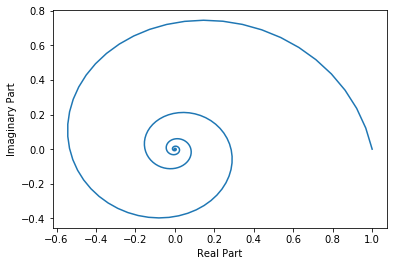

In [3]:
var("t")
sig = exp(-t)*exp(I*5*t)
real = lambdify(t,re(sig),'numpy')
imag = lambdify(t,im(sig),'numpy')
tvals = np.linspace(0,10,400)
plt.plot(real(tvals),imag(tvals));
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part");

----
**Q:** Why Laplace? Why does it help to have systems in frequency domain?
    
**A:** It does make the math easier, which was especially important about 60 years ago when it was all being developed without fancy computers. Many mathematical results about control systems were figured out back then that we still use. Most control engineering these days is probably done in the time domain though.

----
**Q:** Does $u$ gain dimensions as we combine systems?
    
**A:** It can, but doesn't have to. However, $\x$ will likley gain dimensions.

----
**Q:** What is your favorite movie?

**A:** Groundhog day.

---
**Q:** What is your research about?

**A:** We design, build, and test new genetic parts for living system. 

---
**Q:** Is there a way to build systems out of eigenvalues?
    
**A:** Yes, its called physical variable form. 


---
**Q:** What happened to $D$?

**A:** $D$ would be non-zero if some multiple of the control input $u$ somehow ended up directly affecting the output. You might end up with something like $y = x + u$. That's kind of a bad design though, so we usually don't see $D \neq 0$.

Note that if you had a nonlinear system with $y=g(x,u)$ you could get a $D$ matrix from that if it happened that $$\frac{\partial g}{\partial u}$$ was not zero even with $x$ and $u$ equal to zero.

---
**Q:** Where does the $X(s)$ and $H(s)$ come from in the notes?

**A:** When we are reasoning about transfer functions, we'll often introduce new variables to represent temporary quantities and internal signals. 

---
**Q:** Can you give an example where $A$ is not invertible and show how different systems give different trajectories? 

**A:** Sure. The simplest one is one-dimensional:

$$
\dot x = u \\
y = x
$$

In this case, if $u=0$ then the system doesn't go anywhere, so whatever the initial condition is is also the final value.